<b>40. Даны числа $c_k$ - коэффициенты разложения некоторой элементарной функции $x = x(t)$ в ряд Фурье по указанной системе многочленов. Восстановить функцию $x$:
- построить график частичной суммы ряда Фурье достаточно высокого порядка;
- по виду графика сделать предположен.</b>

$c_0 = \frac{4}{3}, c_k = \frac{4(-1)^{k + 1}}{(2k - 1)(2k + 3)\sqrt{2k + 1}}, k = 1, 2, 3, \dots,$ многочлены Лежандра.


Рассмотрим в пространстве $L^2(-1; 1)$ ортонормированный базис, составленный из многочленов Лежандра:

$$\{P_0(t), P_1(t), P_2(t), \dots, P_k(t), \dots\}$$

In [42]:
import sympy as sp
from IPython.display import display, Latex

sp.init_printing(use_latex='mathjax')

k = sp.Symbol('k')
t = sp.Symbol('t')

# Из условия задачи
c0 = sp.Rational(4, 3)
ck = (4*(-1)**(k + 1))/((2*k - 1)*(2*k + 3)*sp.sqrt(2*k + 1))

# Найдем многочлены Лежандра:
n = 45

p = [1]
for i in range(1, n + 1):
    p.append(t**i)
    for j in range(i - 1):
        p[i] = p[i] - p[j]*((sp.integrate((t**i)*p[j], (t, -1, 1)))/(sp.integrate(p[j]*p[j], (t, -1, 1))))

display(Latex("Нашли " + str(n) + " первых многочленов Лежандра"))

<IPython.core.display.Latex object>

Любую функцию $x \in L^2(-1; 1)$ можно разложить в ряд Фурье по этому базису. И наоборот, по известным коэффициентам Фурье можно восстановить функцию $x$.

Построим график частичной суммы ряда Фурье достаточно высокого порядка $n = 30$.

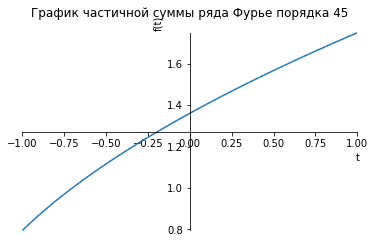

In [49]:
x = c0*p[0]

for i in range(1, n + 1):
    x += ck.subs(k, i)*p[i]
    
leveled_title = "График частичной суммы ряда Фурье порядка " + str(n)
sp.plot(x, 
        (t, -1, 1),
        title=leveled_title)


Порядок частичной суммы ряда Фурье выбран таким, что дальнейшее его увеличение не вносило визуально различимых изменений в график. По виду графика выдвигаем гипотезу: $x(t) = $. Для обоснования гипотезы проверим численные данные. 

Найдем норму функции $x(t)$

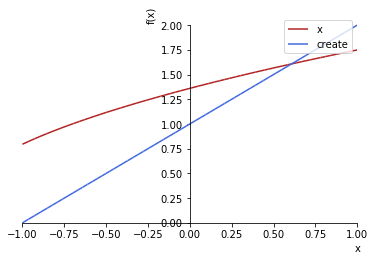

In [50]:

plt = sp.plot((x, (t, -1, 1)), 
            (t + 1, (t, -1, 1)),
            show=False,
            legend=True)
plt[0].line_color = 'firebrick'
plt[0].label = 'x'
plt[1].line_color = 'royalblue'
plt[1].label = 'create'
plt.show()